If everything went well, the learned categories should reflect our intuitions. We will reduce their dimensionalities and visualize.

In [1]:
import embed_helpers as eh
import pickle
import h5py
import pandas as pd

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


Load the embeddings

In [2]:
with open("models/embeddings.pickle", 'rb') as f:
    [country_embedding,
     education_embedding,
     marital_status_embedding,
     occupation_embedding,
     race_embedding, 
     relationship_embedding,
     work_class_embedding] = pickle.load(f)
 

In [3]:
embeddings = [country_embedding,education_embedding,marital_status_embedding,occupation_embedding,
                              race_embedding, relationship_embedding,work_class_embedding]

Load the label-encoders - to get the category values

In [4]:
les = pickle.load(open('models/label_encoders.pickle', 'rb'))

In [5]:
# retrieve embedding values
workclass=les[0].classes_; 
education=les[1].classes_; 
marital_status=les[2].classes_; 
occupation=les[3].classes_;
relationship=les[4].classes_; 
race=les[5].classes_;
sex=les[6].classes_;
native_country=les[7].classes_;

In [6]:
values = [native_country, education, marital_status, occupation, race, relationship, workclass]

In [7]:
# example: categories list for workclass
workclass

array(['Federal-gov', 'Local-gov', 'Private', 'Self-emp-inc',
       'Self-emp-not-inc', 'State-gov', 'Without-pay'], dtype=object)

Run visualization for some categories

In [8]:
embedding_names = ['country_embedding','education_embedding','marital_status_embedding','occupation_embedding',
                              'race_embedding', 'relationship_embedding','work_class_embedding']


-----------------------------------
country_embedding

-----------------------------------
initial shape: (41, 10)
Reducing the dimensionility of vectors from 10 to 2 ...



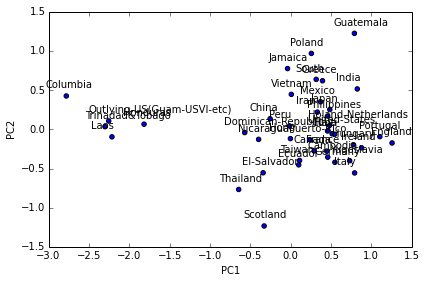


-----------------------------------
education_embedding

-----------------------------------
initial shape: (16, 4)
Reducing the dimensionility of vectors from 4 to 2 ...



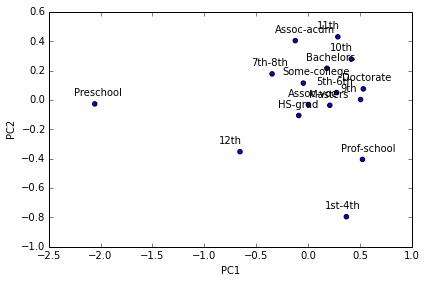


-----------------------------------
marital_status_embedding

-----------------------------------
initial shape: (7, 3)
Reducing the dimensionility of vectors from 3 to 2 ...



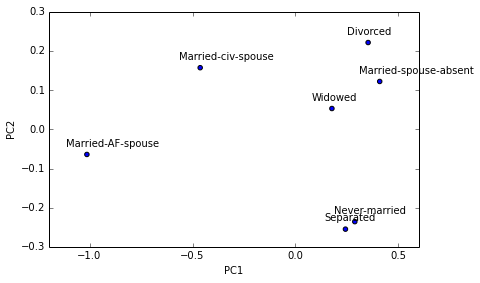


-----------------------------------
occupation_embedding

-----------------------------------
initial shape: (14, 3)
Reducing the dimensionility of vectors from 3 to 2 ...



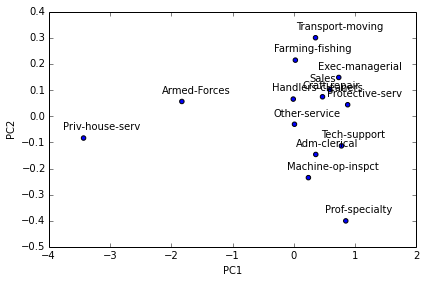


-----------------------------------
race_embedding

-----------------------------------
initial shape: (5, 2)
Reducing the dimensionility of vectors from 2 to 2 ...



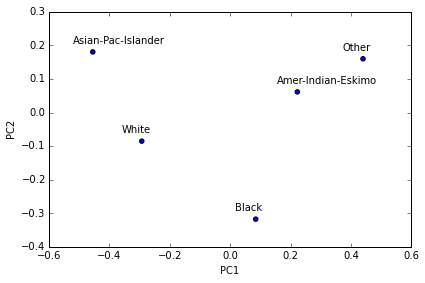


-----------------------------------
relationship_embedding

-----------------------------------
initial shape: (6, 3)
Reducing the dimensionility of vectors from 3 to 2 ...



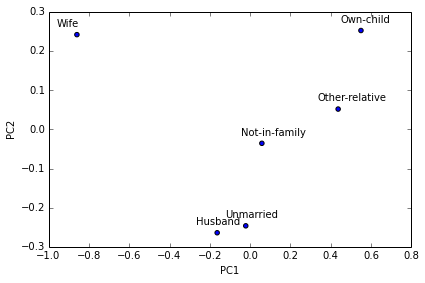


-----------------------------------
work_class_embedding

-----------------------------------
initial shape: (7, 3)
Reducing the dimensionility of vectors from 3 to 2 ...



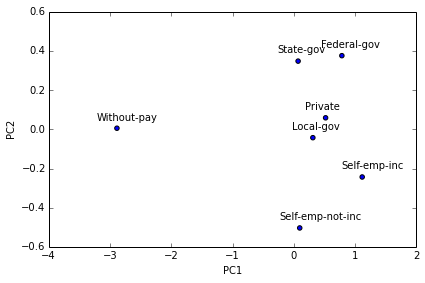

In [9]:
for i, (embedding, labels) in enumerate(zip(embeddings, values)):
    print('\n-----------------------------------\n{0}'.format(embedding_names[i]))
    eh.pca_and_visualize(embedding, labels,)

There are indeed some interesting and obvious embeddings that concur with our intuitions. For example, the work_class_embedding was able to distance the category `without_pay` from the rest of the work classes. There should be some more intuitive illustrations in these plots but unfortunately I'm running out of time to pay attention :(

We can now, if we like, can use these embeddings to train a totally new model, say XGBoost or a Random Forest.